- author: Johannes L. Fjeldså
- email: johannes.larsen.fjeldså@nmbu.no

# Testing latitude weighting of spatial means. 

## Sources:

- https://docs.xarray.dev/en/latest/examples/area_weighted_temperature.html

## import libraries

In [9]:
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
from src.preproces import *

## Example

Open a test file, I use one that has annual climatology and that has been sea-masked. 

In [10]:
file_handler = Handle_Files()
file_path = '/nird/home/johannef/Masterthesis_S23 DataFiles/sea_masked_annual_climatalogies/pr/ssp245/pr_yr_ACCESS-ESM1-5_ssp245_r2i1p1f1_gn_2015-2100_seamasked.nc'

test_file = file_handler.read_netcdf_to_xr(file_path)
test_file

<xarray.Dataset>
Dimensions:  (year: 86, lat: 145, lon: 192)
Coordinates:
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    pr       (year, lat, lon) float32 ...

Calculate the weights. The weights are dependent upon the model resolution (through the lattitude degrees).

In [11]:
weights = weights = np.cos(np.deg2rad(test_file['lat']))
weights.name = "weights"
weights

<xarray.DataArray 'weights' (lat: 145)>
array([6.12323400e-17, 2.18148850e-02, 4.36193874e-02, 6.54031292e-02,
       8.71557427e-02, 1.08866875e-01, 1.30526192e-01, 1.52123386e-01,
       1.73648178e-01, 1.95090322e-01, 2.16439614e-01, 2.37685892e-01,
       2.58819045e-01, 2.79829014e-01, 3.00705800e-01, 3.21439465e-01,
       3.42020143e-01, 3.62438038e-01, 3.82683432e-01, 4.02746690e-01,
       4.22618262e-01, 4.42288690e-01, 4.61748613e-01, 4.80988769e-01,
       5.00000000e-01, 5.18773258e-01, 5.37299608e-01, 5.55570233e-01,
       5.73576436e-01, 5.91309648e-01, 6.08761429e-01, 6.25923472e-01,
       6.42787610e-01, 6.59345815e-01, 6.75590208e-01, 6.91513056e-01,
       7.07106781e-01, 7.22363962e-01, 7.37277337e-01, 7.51839807e-01,
       7.66044443e-01, 7.79884483e-01, 7.93353340e-01, 8.06444604e-01,
       8.19152044e-01, 8.31469612e-01, 8.43391446e-01, 8.54911871e-01,
       8.66025404e-01, 8.76726756e-01, 8.87010833e-01, 8.96872742e-01,
       9.06307787e-01, 9.15311479e-01, 9.23879533e-01, 9.32007869e-01,
       9.39692621e-01, 9.46930129e-01, 9.53716951e-01, 9.60049854e-01,
       9.65925826e-01, 9.71342070e-01, 9.76296007e-01, 9.80785280e-01,
       9.84807753e-01, 9.88361510e-01, 9.91444861e-01, 9.94056338e-01,
       9.96194698e-01, 9.97858923e-01, 9.99048222e-01, 9.99762027e-01,
       1.00000000e+00, 9.99762027e-01, 9.99048222e-01, 9.97858923e-01,
       9.96194698e-01, 9.94056338e-01, 9.91444861e-01, 9.88361510e-01,
       9.84807753e-01, 9.80785280e-01, 9.76296007e-01, 9.71342070e-01,
       9.65925826e-01, 9.60049854e-01, 9.53716951e-01, 9.46930129e-01,
       9.39692621e-01, 9.32007869e-01, 9.23879533e-01, 9.15311479e-01,
       9.06307787e-01, 8.96872742e-01, 8.87010833e-01, 8.76726756e-01,
       8.66025404e-01, 8.54911871e-01, 8.43391446e-01, 8.31469612e-01,
       8.19152044e-01, 8.06444604e-01, 7.93353340e-01, 7.79884483e-01,
       7.66044443e-01, 7.51839807e-01, 7.37277337e-01, 7.22363962e-01,
       7.07106781e-01, 6.91513056e-01, 6.75590208e-01, 6.59345815e-01,
       6.42787610e-01, 6.25923472e-01, 6.08761429e-01, 5.91309648e-01,
       5.73576436e-01, 5.55570233e-01, 5.37299608e-01, 5.18773258e-01,
       5.00000000e-01, 4.80988769e-01, 4.61748613e-01, 4.42288690e-01,
       4.22618262e-01, 4.02746690e-01, 3.82683432e-01, 3.62438038e-01,
       3.42020143e-01, 3.21439465e-01, 3.00705800e-01, 2.79829014e-01,
       2.58819045e-01, 2.37685892e-01, 2.16439614e-01, 1.95090322e-01,
       1.73648178e-01, 1.52123386e-01, 1.30526192e-01, 1.08866875e-01,
       8.71557427e-02, 6.54031292e-02, 4.36193874e-02, 2.18148850e-02,
       6.12323400e-17])
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y
    bounds:         lat_bnds

Apply weighted mean calculation.

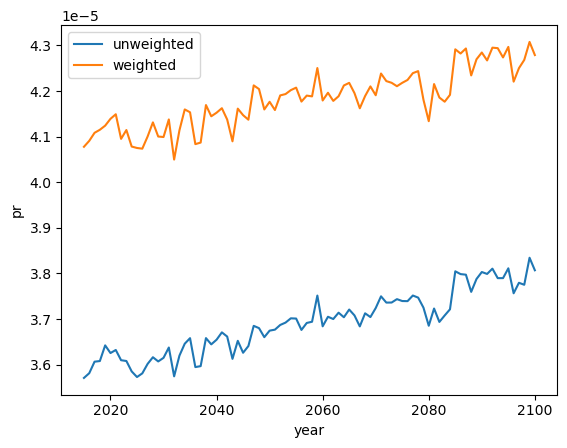

In [12]:
from cProfile import label


preprocesser = Preprocess_Climate_Data()

global_climataology = preprocesser.create_spatial_climatology(test_file,
                                                              var_name='pr',
                                                              climatology_type='global')

global_climataology_weighted = preprocesser.create_spatial_climatology(test_file,
                                                                       var_name='pr',
                                                                       weights=weights,
                                                                       climatology_type='global')

global_climataology['pr'].plot(label='unweighted')
global_climataology_weighted['pr'].plot(label='weighted')
plt.legend()
plt.show()


# Create the spatial climatologies in bulk

In [15]:
variables = ['pr', 'tas', 'rx5dayETCCDI', 'txxETCCDI']
scenarios = ['ssp126', 'ssp245', 'ssp370', 'ssp585']

In [32]:
def run_global_climatology(data_folder, save_folder):
    main_data_folder = '/nird/home/johannef/Masterthesis_S23 DataFiles/' + data_folder
    main_save_folder = '/nird/home/johannef/Masterthesis_S23 DataFiles/AnnualGlobalClimatologies/' + save_folder

    for var in variables:
        for scenario in scenarios:
            data_folder = '/'.join([main_data_folder, var, scenario])
            save_folder = '/'.join([main_save_folder, var, scenario])

            file_names = file_handler.get_all_filenames_in_dir(data_folder)
            
            for file_name in file_names:
                save_name = file_name.replace('.nc', '_glob.nc')
                ds = file_handler.read_netcdf_to_xr(directory=data_folder,
                                                    file_name=file_name)
                preprocesser.create_spatial_climatology(test_file,
                                                        var_name=var,
                                                        weights=weights,
                                                        climatology_type='global',
                                                        save_to_dataset=True, 
                                                        file_name=save_name,
                                                        directory=save_folder,
                                                        is_original_name=False)

### No masks

In [30]:
run_global_climatology('Annualclimatologies', 'nomask')

### Land-sea masked 

In [34]:
run_global_climatology('land_masked_annual_climatalogies', 'landmasked')
run_global_climatology('sea_masked_annual_climatalogies', 'seamasked')


In [ ]:
main_data_folder = '/nird/home/johannef/Masterthesis_S23 DataFiles/land_masked_annual_climatalogies'
main_save_folder = '/nird/home/johannef/Masterthesis_S23 DataFiles/AnnualGlobalClimatologies/seamasked'

for var in variables:
    for scenario in scenarios:
        data_folder = '/'.join([main_data_folder, var, scenario])
        save_folder = '/'.join([main_save_folder, var, scenario])

        file_names = file_handler.get_all_filenames_in_dir(data_folder)
        
        for file_name in file_names:
            save_name = file_name.replace('_landmasked.nc', '_glob_landmasked.nc')
            ds = file_handler.read_netcdf_to_xr(directory=data_folder,
                                                file_name=file_name)
            preprocesser.create_spatial_climatology(test_file,
                                                    var_name=var,
                                                    weights=weights,
                                                    climatology_type='global',
                                                    save_to_dataset=True, 
                                                    file_name=save_name,
                                                    directory=save_folder,
                                                    is_original_name=False)

# future masks?

- vil områder som SIO, EIO ha stor variasjon i ekstremnedbør
- vil områder som afrika (SAH, WAF, CAF, WSAF, ESAF, SEAF, NEAF) ha laver variasjon?
- Vil arktiske regioner gi et tidligere signal? hvilke velger man isåfall?
https://www.ipcc.ch/report/ar6/wg1/downloads/figures/IPCC_AR6_WGI_Figure_1_18.png
- Lese opp for å finne områder med mindre støy på signalet